In [1]:
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

import sklearn.preprocessing as prep
import tensorflow as tf

from LstmVAE import LSTM_Var_Autoencoder
from LstmVAE import preprocess

name = '/home/mabbasloo/Documents/carData4/data/lbo/'
name1 = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/data/'

In [2]:
filename = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/list'
st = 6
stride = 10
with open(filename) as f:
    data = f.readlines() 
data = [x.strip() for x in data]   
data = sorted(data, key=lambda x:x[0:4])[0::stride]
print (len(data), np.int(len(data)/st))
for i in range(5*st):
    print (data[i])
#print (data[len(data)-1])
#for i in range(len(data)):
#    print (data[i])

1230 205
f001_S2000001_1.mat
f001_S2000001_11.mat
f001_S2000001_21.mat
f001_S2000001_31.mat
f001_S2000001_41.mat
f001_S2000001_51.mat
f002_S2000001_1.mat
f002_S2000001_11.mat
f002_S2000001_21.mat
f002_S2000001_31.mat
f002_S2000001_41.mat
f002_S2000001_51.mat
f003_S2000001_1.mat
f003_S2000001_11.mat
f003_S2000001_21.mat
f003_S2000001_31.mat
f003_S2000001_41.mat
f003_S2000001_51.mat
f004_S2000001_1.mat
f004_S2000001_11.mat
f004_S2000001_21.mat
f004_S2000001_31.mat
f004_S2000001_41.mat
f004_S2000001_51.mat
f005_S2000001_1.mat
f005_S2000001_11.mat
f005_S2000001_21.mat
f005_S2000001_31.mat
f005_S2000001_41.mat
f005_S2000001_51.mat


In [7]:
DATA = []
d = 30
#hm = 20*st
hm = len(data)
dimm = 1714
db = h5py.File(name + data[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0
for i in range(hm):
    #db = h5py.File(name + data[i], 'r')
    #ds = db['Phi']
    #ds = np.asarray(ds).astype(np.float32).T
    #ds = ds[:, 500-d:]
    #print (ds.shape)
    db1 = h5py.File(name1 + data[i], 'r')
    ds1 = db1['shape_xyz']
    ds1 = np.asarray(ds1).astype(np.float32)
    ds1[np.isnan(ds1)] = 0.0
    ds1[np.isinf(ds1)] = 0.0
    ds1[0] = ds1[0]/np.linalg.norm(ds1[0])
    ds1[1] = ds1[1]/np.linalg.norm(ds1[1])
    ds1[2] = ds1[2]/np.linalg.norm(ds1[2])    
    if ds1.shape[1] == dimm: # f256_S2000001_6.mat has different dimension so f256_S2000001* are removed.
        DATA.append(np.dot(ds1, ds))
    else:
        print (data[i])     

dim = np.int(len(data)/st)

print (len(DATA), DATA[0].shape, dim)

def standard_scale(X_train):
    for i in range(len(X_train)):
        X_train[i] = X_train[i]/np.linalg.norm(X_train[i], 'fro')
    return X_train

DATA = standard_scale(DATA)

1230 (3, 30) 205


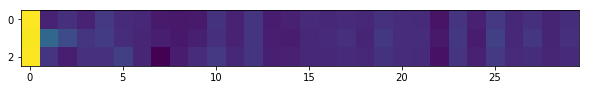

In [8]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA[0])

Text(0.5, 0, 'z')

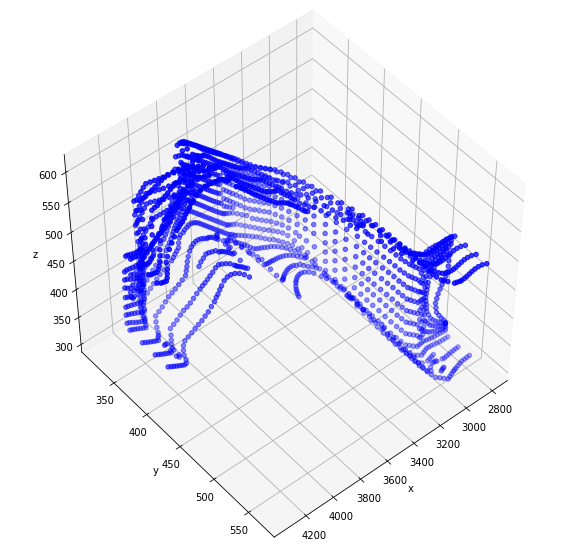

In [9]:
db1 = h5py.File(name1 + data[0], 'r')
ds1 = db1['shape_xyz']
ds1 = np.asarray(ds1).astype(np.float32)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds1[0], ds1[1], ds1[2], c='b', marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(3, 1714)


Text(0.5, 0, 'z')

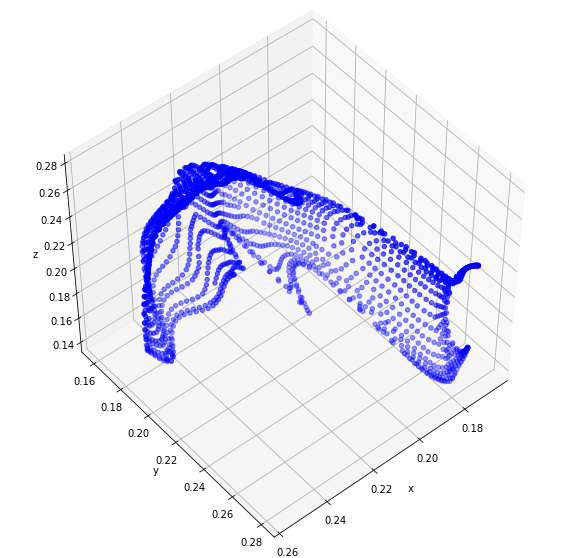

In [10]:
xyz = np.dot(DATA[0], np.linalg.pinv(ds))
print (xyz.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2], c='b', marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

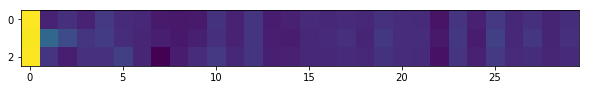

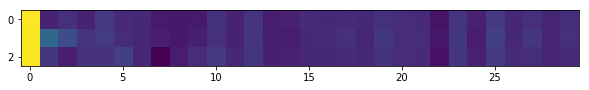

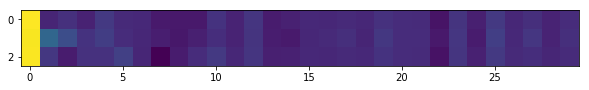

In [11]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA[dim-1])
plt.figure(figsize=(10, 10)); plt.imshow(DATA[dim])
plt.figure(figsize=(10, 10)); plt.imshow(DATA[dim+1])

------------------------------part embedding------------------------------

In [12]:
dim2 = 200
vae = LSTM_Var_Autoencoder(intermediate_dim = 100, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae.fit(DATA[0:dim2*st], learning_rate=0.001, batch_size = 10, num_epochs = 100, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.00540
Epoch   11   Loss 0.00001
Epoch   21   Loss 0.00001
Epoch   31   Loss 0.00001
Epoch   41   Loss 0.00001
Epoch   51   Loss 0.00001
Epoch   61   Loss 0.00001
Epoch   71   Loss 0.00001
Epoch   81   Loss 0.00001
Epoch   91   Loss 0.00001


Training time 3.48 minutes


In [13]:
x_reconstructed, recons_error = vae.reconstruct(DATA[dim2*st:], get_error = True) #returns squared error

x_reduced = vae.reduce(DATA) #latent space representation

Text(0.5, 0, 'latent 3')

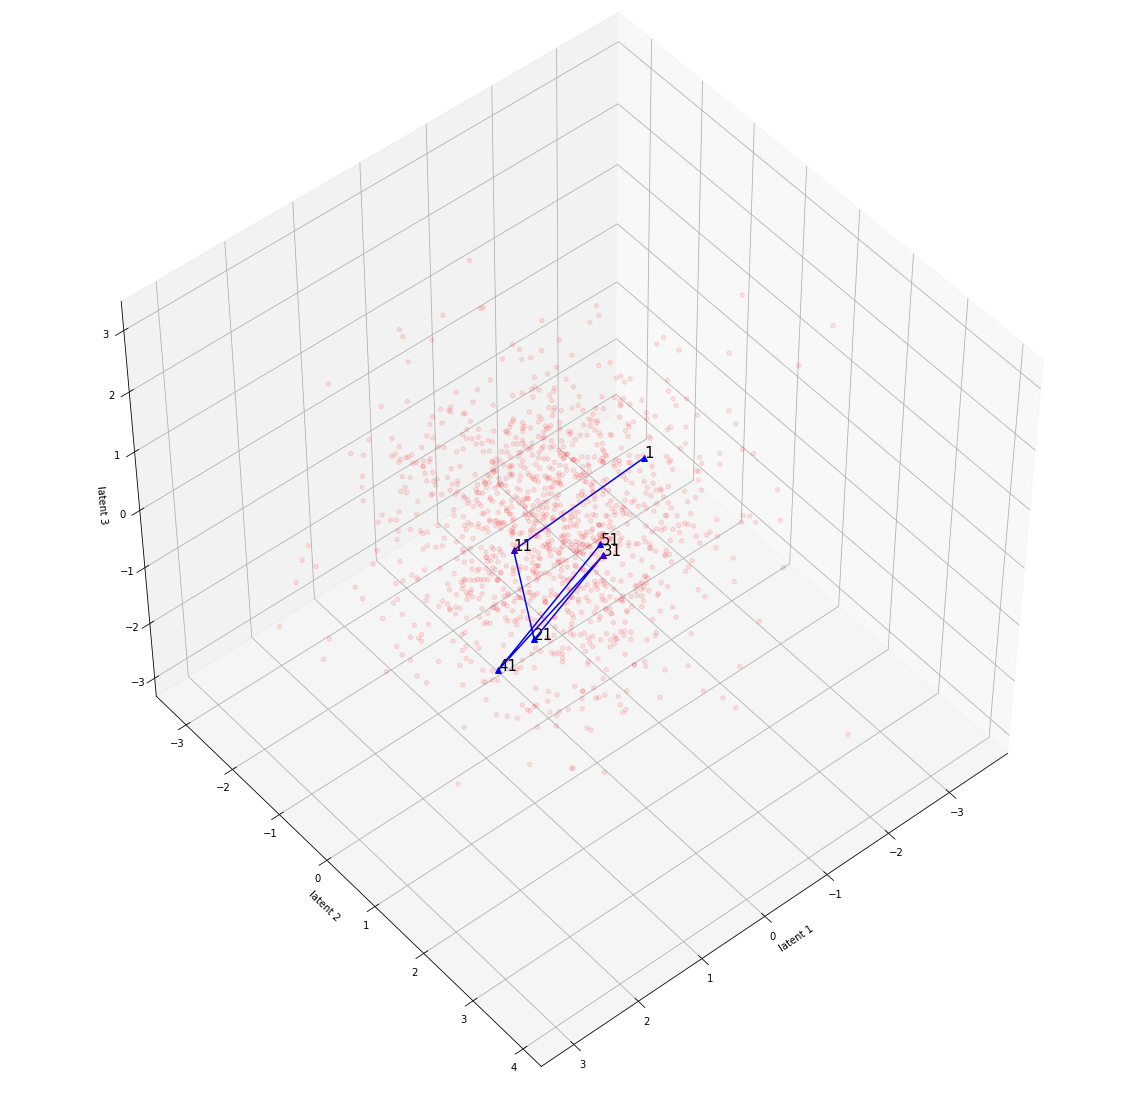

In [15]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']
label = []
for i in range(0, st):
    label.append(np.str(i*stride+1))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced[0:dim2*st, 0], x_reduced[0:dim2*st, 1], x_reduced[0:dim2*st, 2], c=c[0], marker=m[0], alpha=0.1)
ax.plot(x_reduced[dim2*st:(dim2+1)*st, 0], x_reduced[dim2*st:(dim2+1)*st, 1], x_reduced[dim2*st:(dim2+1)*st, 2], c=c[1], marker=m[1])
ii = 0
for i in range(dim2*st, (dim2+1)*st):
    ax.text(x_reduced[i, 0], x_reduced[i, 1], x_reduced[i, 2], label[ii], size=15, zorder=1, color='k') 
    ii += 1
ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

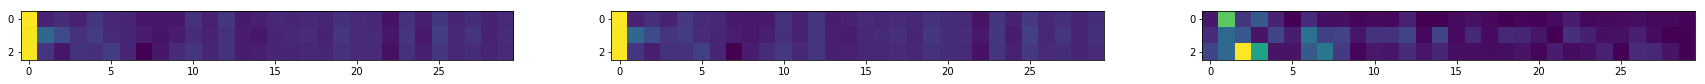

In [16]:
plt.figure(figsize=(30, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed[0])
plt.subplot(1,3,2); plt.imshow(DATA[dim2*st])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed[0] - DATA[dim2*st]))

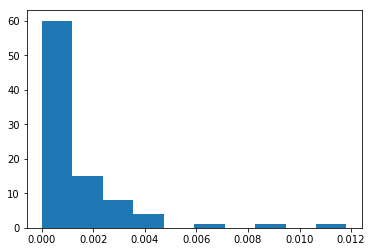

In [17]:
_,_,_ = plt.hist(np.abs(x_reconstructed[0] - DATA[dim2*st]).reshape((3*d)), bins=10)

(3, 1714)
(3, 1714)


Text(0.5, 0, 'z')

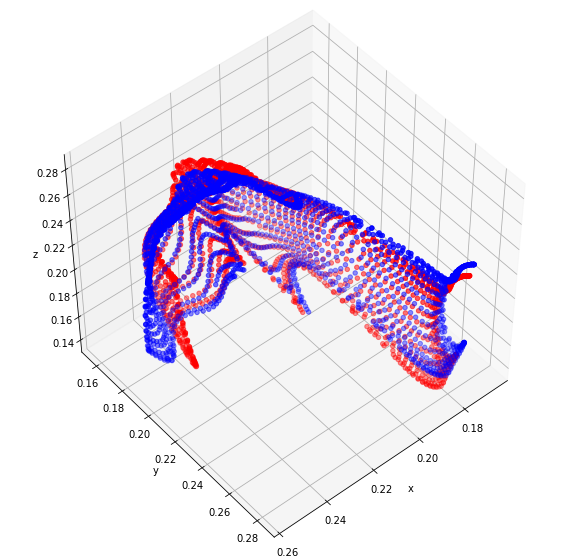

In [20]:
xyz = np.dot(DATA[dim2*st], np.linalg.pinv(ds))
xyz_reconstructed = np.dot(x_reconstructed[0], np.linalg.pinv(ds))
print (xyz_reconstructed.shape)
print (xyz.shape)
fig = plt.figure(figsize=(10, 10))
c = ['b', 'r']
m = ['o', 'o']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2], c=c[0], marker=m[0])
ax.scatter(xyz_reconstructed[0], xyz_reconstructed[1], xyz_reconstructed[2], c=c[1], marker=m[1])
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [32]:
print (x_reduced.shape)
DATA2 = []
for i in range(dim):
    D = x_reduced[i*st:(i+1)*st, :].T
    D[0] = D[0]/np.linalg.norm(D[0])
    D[1] = D[1]/np.linalg.norm(D[1])
    D[2] = D[2]/np.linalg.norm(D[2])
    #for ii in range(len(D)):
    #    D[:, ii] = D[:, ii]/np.linalg.norm(D[:, ii])
    #D = D/np.linalg.norm(D)
    DATA2.append(D)
print (len(DATA2), DATA2[0].shape)  
dd = st

(1230, 3)
205 (3, 6)


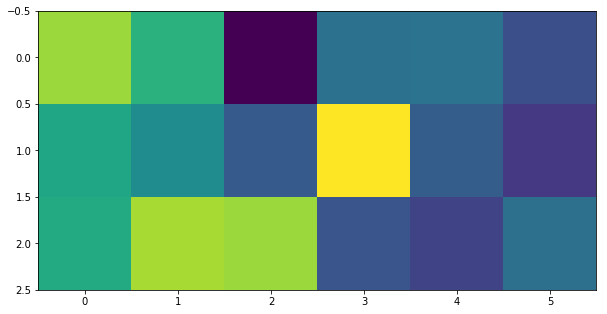

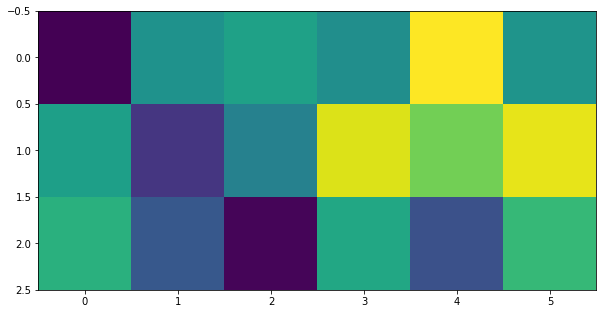

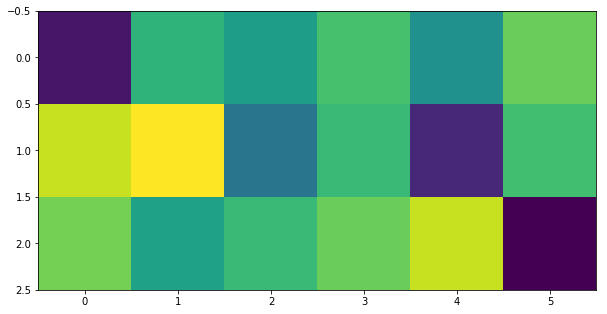

In [33]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA2[dim2-1])
plt.figure(figsize=(10, 10)); plt.imshow(DATA2[dim2])
plt.figure(figsize=(10, 10)); plt.imshow(DATA2[dim2+1])

------------------------------sequence embedding------------------------------

In [34]:
vae2 = LSTM_Var_Autoencoder(intermediate_dim = 100, z_dim = 3, n_dim=dd, stateful = True) #default stateful = False

vae2.fit(DATA2[0:dim2], learning_rate=0.001, batch_size = 10, num_epochs = 100, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.16737
Epoch   11   Loss 0.16630
Epoch   21   Loss 0.16591
Epoch   31   Loss 0.16594
Epoch   41   Loss 0.16591
Epoch   51   Loss 0.16572
Epoch   61   Loss 0.16592
Epoch   71   Loss 0.16576
Epoch   81   Loss 0.16581
Epoch   91   Loss 0.16572


Training time 0.33 minutes


In [35]:
x_reconstructed2, recons_error2 = vae2.reconstruct(DATA2[dim2:], get_error = True) #returns squared error

x_reduced2 = vae2.reduce(DATA2) #latent space representation

Text(0.5, 0, 'latent 3')

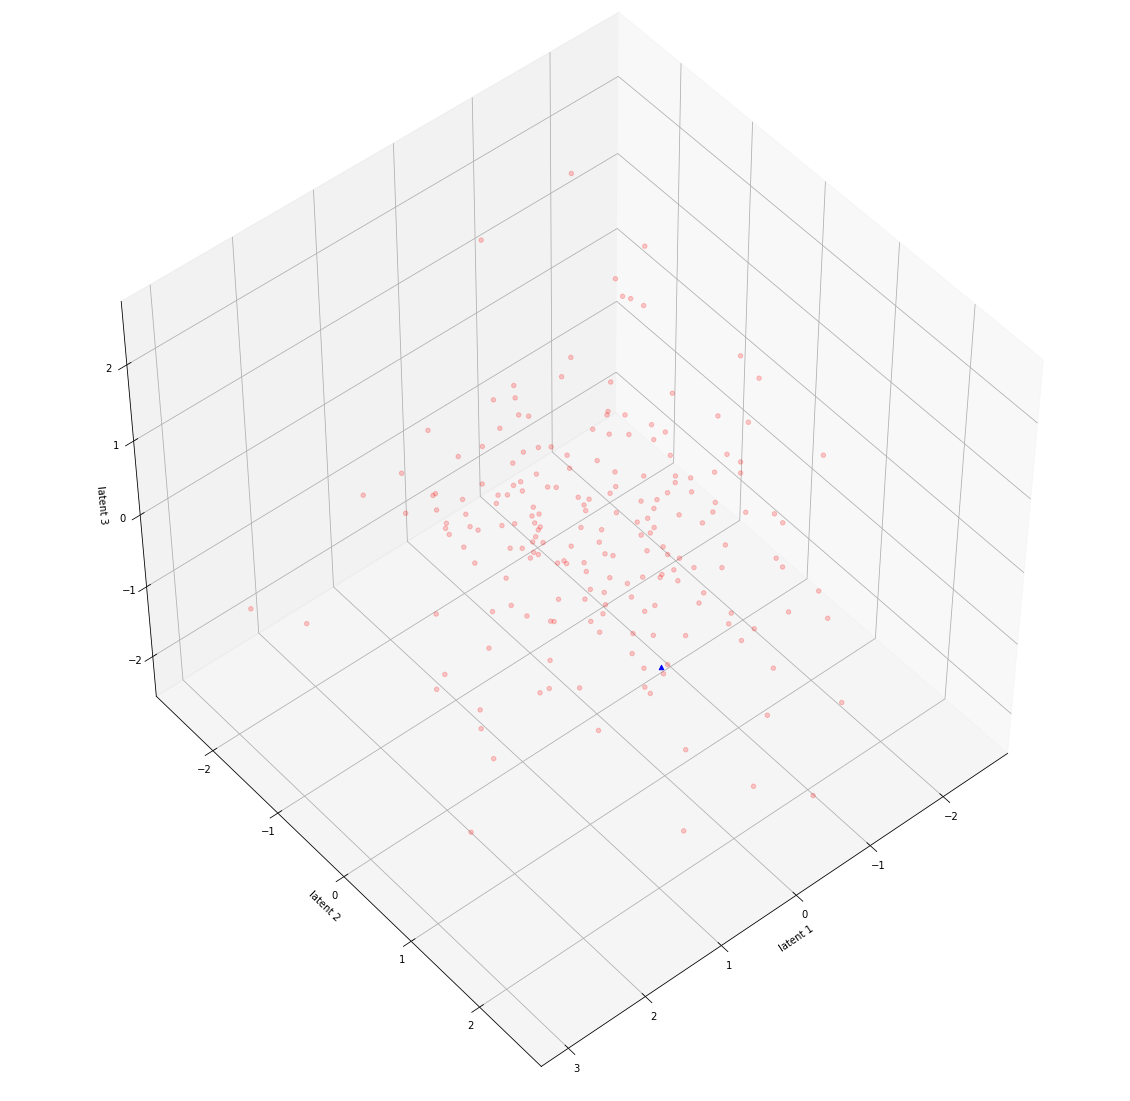

In [36]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced2[0:dim2, 0], x_reduced2[0:dim2, 1], x_reduced2[0:dim2, 2], c=c[0], marker=m[0], alpha=0.2)
ax.scatter(x_reduced2[dim2:dim2+1, 0], x_reduced2[dim2:dim2+1, 1], x_reduced2[dim2:dim2+1, 2], c=c[1], marker=m[1])

ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

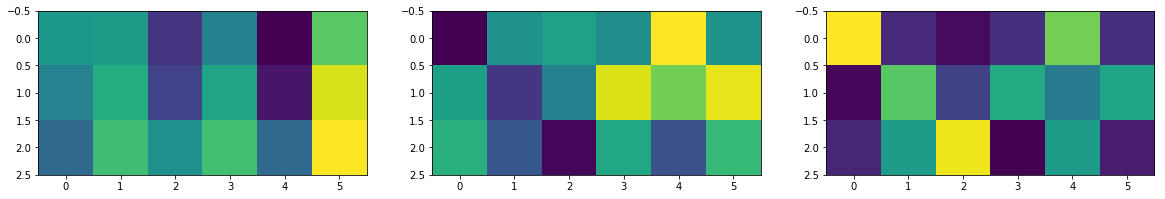

In [37]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed2[0])
plt.subplot(1,3,2); plt.imshow(DATA2[dim2])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed2[0] - DATA2[dim2]))

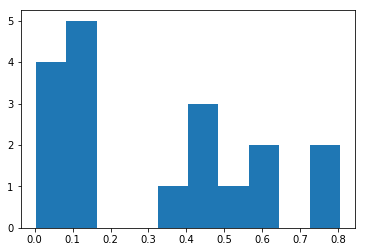

In [38]:
_,_,_ = plt.hist(np.abs(x_reconstructed2[0] - DATA2[dim2]).reshape((3*dd)), bins=10)

In [53]:
DATA3 = []
for i in range(dim):
    D = np.asarray(DATA[i*st:(i+1)*st]).reshape(st*3, d)
    DATA3.append(D)
print (len(DATA3), DATA3[0].shape)  
ddd = st*3
print (ddd, d)
dim3 = 200

205 (18, 30)
18 30


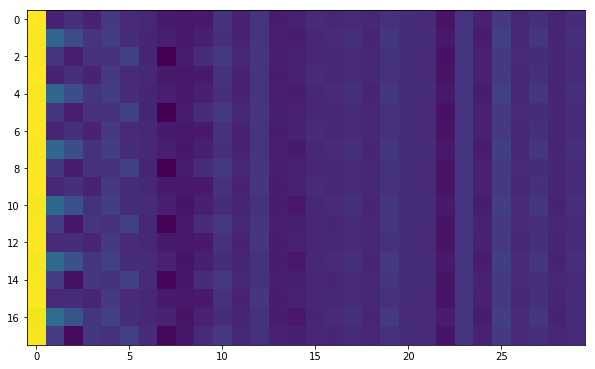

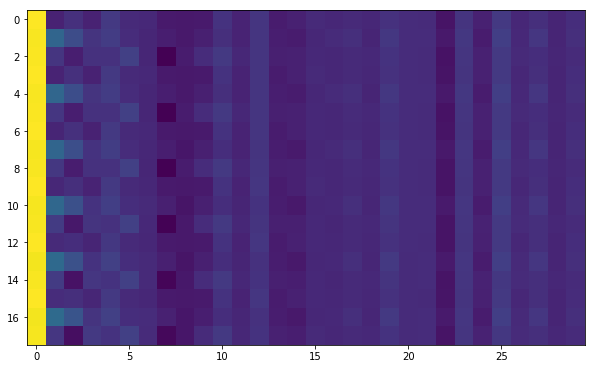

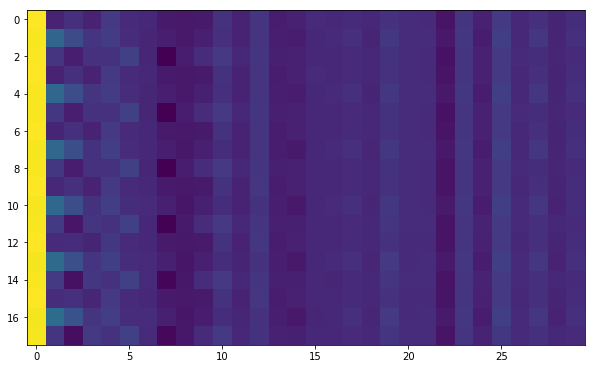

In [54]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA3[dim3-1])
plt.figure(figsize=(10, 10)); plt.imshow(DATA3[dim3])
plt.figure(figsize=(10, 10)); plt.imshow(DATA3[dim3+1])

------------------------------sequence embedding------------------------------

In [56]:
vae3 = LSTM_Var_Autoencoder(intermediate_dim = 500, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae3.fit(DATA3[0:dim3], learning_rate=0.005, batch_size = 10, num_epochs = 200, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.01551
Epoch   11   Loss 0.00029
Epoch   21   Loss 0.00002
Epoch   31   Loss 0.00002
Epoch   41   Loss 0.00001
Epoch   51   Loss 0.00001
Epoch   61   Loss 0.00001
Epoch   71   Loss 0.00001
Epoch   81   Loss 0.00001
Epoch   91   Loss 0.00001
Epoch  101   Loss 0.00001
Epoch  111   Loss 0.00001
Epoch  121   Loss 0.00001
Epoch  131   Loss 0.00001
Epoch  141   Loss 0.00001
Epoch  151   Loss 0.00001
Epoch  161   Loss 0.00001
Epoch  171   Loss 0.00001
Epoch  181   Loss 0.00001
Epoch  191   Loss 0.00001


Training time 8.67 minutes


In [57]:
x_reconstructed3, recons_error3 = vae3.reconstruct(DATA3[dim3:], get_error = True) #returns squared error

x_reduced3 = vae3.reduce(DATA3) #latent space representation

Text(0.5, 0, 'latent 3')

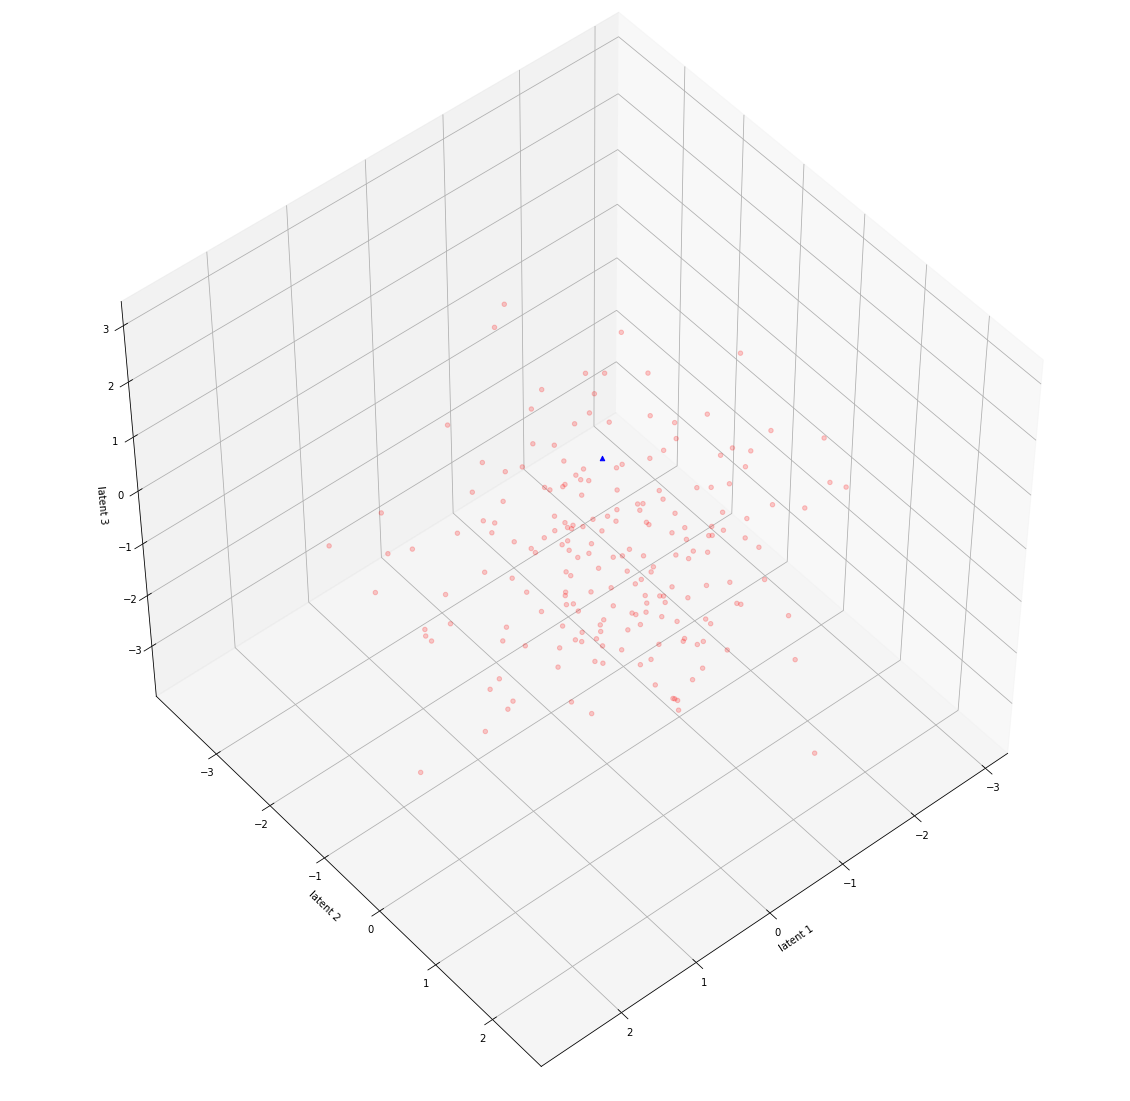

In [58]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced3[0:dim3, 0], x_reduced3[0:dim3, 1], x_reduced3[0:dim3, 2], c=c[0], marker=m[0], alpha=0.2)
ax.scatter(x_reduced3[dim3:dim3+1, 0], x_reduced3[dim3:dim3+1, 1], x_reduced3[dim3:dim3+1, 2], c=c[1], marker=m[1])

ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

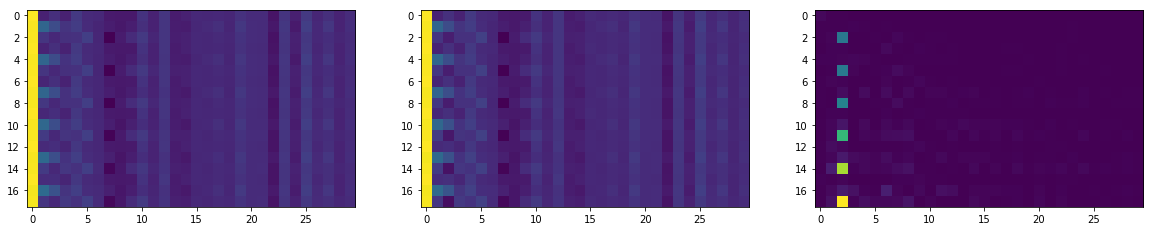

In [59]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed3[0])
plt.subplot(1,3,2); plt.imshow(DATA3[dim3])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed3[0] - DATA3[dim3]))

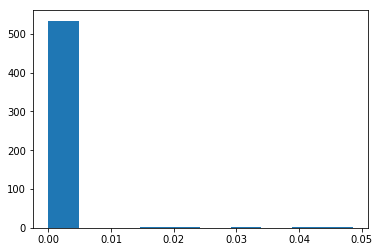

In [60]:
_,_,_ = plt.hist(np.abs(x_reconstructed3[0] - DATA3[dim3]).reshape((d*ddd)), bins=10)

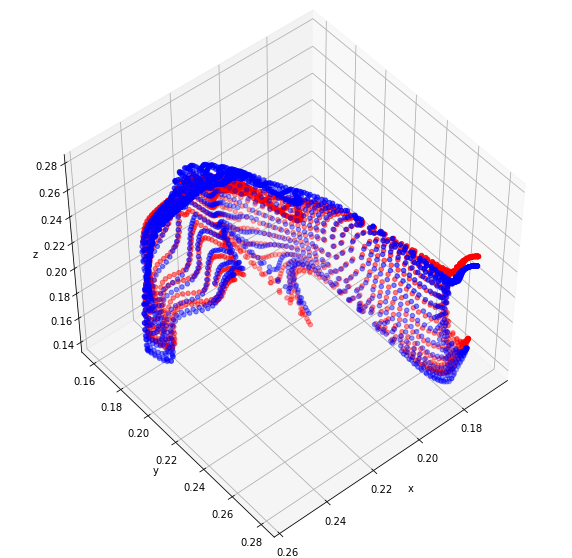

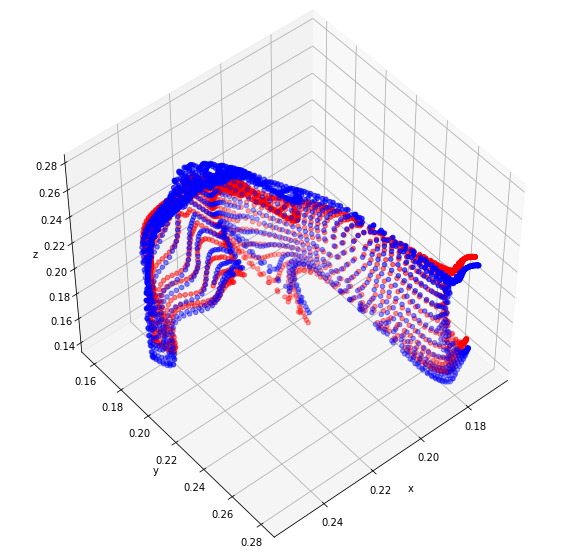

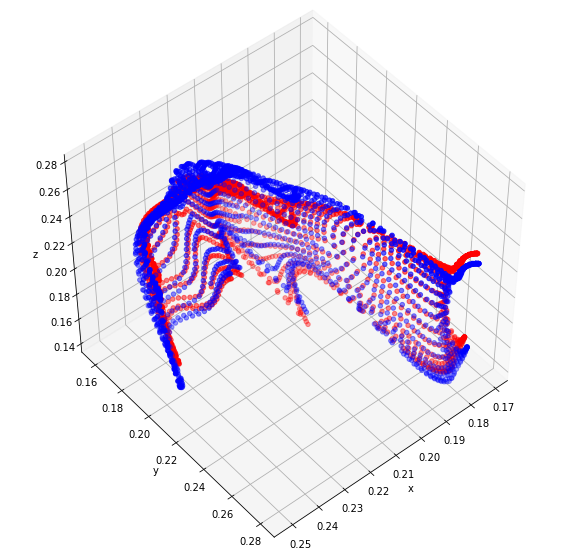

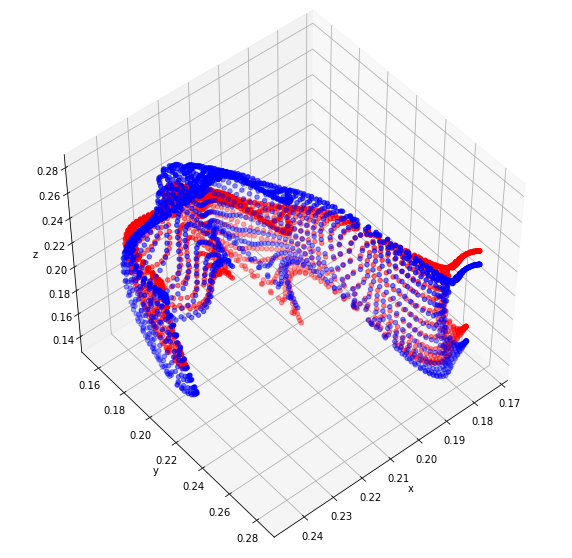

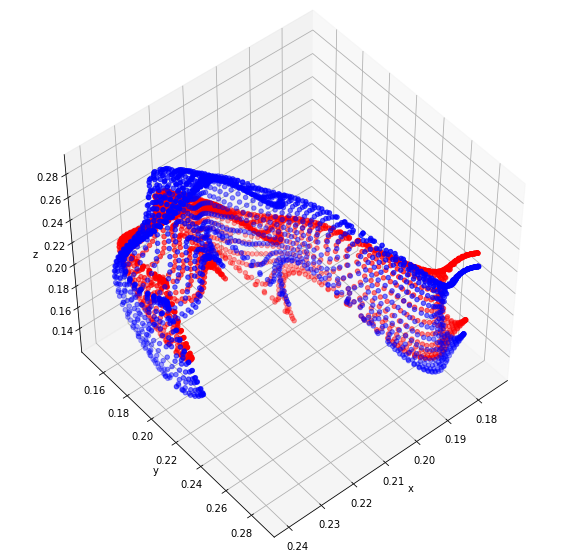

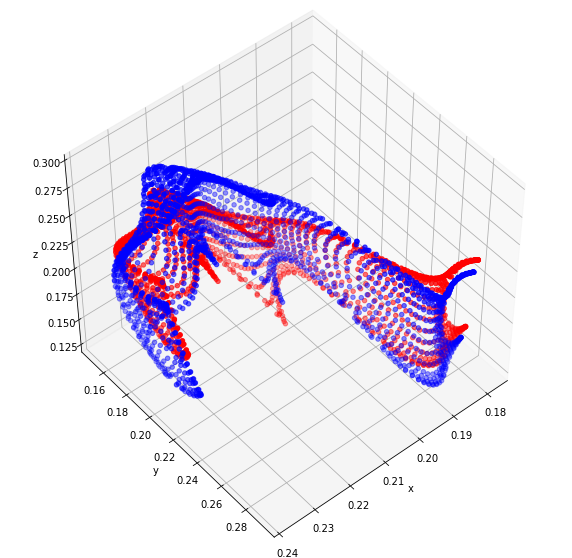

In [61]:
for i in range(st):
    xyz3 = np.dot(DATA[dim3*st+i], np.linalg.pinv(ds))
    xyz_reconstructed3 = np.dot(x_reconstructed3[0, i*3:(i+1)*3], np.linalg.pinv(ds))
    fig = plt.figure(figsize=(10, 10))
    c = ['b', 'r']
    m = ['o', 'o']
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2], c=c[1], marker=m[1])
    ax.scatter(xyz3[0], xyz3[1], xyz3[2], c=c[0], marker=m[0])
    ax.view_init(50, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 